## Введение ##

Добро пожаловать!

Данный проект посвящен теме "Градиентный бустинг" и выполнен в рамках учебного курса от "Яндекс.Практикум" студентом XV когорты курса "Data Science+" Васюхиным Артёмом.

В этом проекте мы рассмотрим базу данных компании по продаже подержанных автомобилей "Не бит, не крашен", которая намерена разработать мобильное приложение для своего сервиса. Внутри приложения будет возможность быстрой оценки продаваемого автомобиля. Соответственно, наша задача - разработать модель по предсказанию цены авто.

**Описание данных**

***Признаки***
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
    
***Целевой признак***
* Price — цена (евро)

## Импорт библиотек и датасета ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
try:
    df = pd.read_csv('autos.csv')
except:
    df = pd.read_csv('/datasets/autous.csv')

In [3]:
print('Размер таблицы:', df.shape)
display(df.head())
display(df.info())
display(df.isnull().sum())
print('Число дубликатов:', df.duplicated().sum())
display(df[df.duplicated()])

Размер таблицы: (354369, 17)


,Unnamed: 0,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         354369 non-null  int64 
 1   DateCrawled        354369 non-null  object
 2   Price              354369 non-null  int64 
 3   VehicleType        316879 non-null  object
 4   RegistrationYear   354369 non-null  int64 
 5   Gearbox            334536 non-null  object
 6   Power              354369 non-null  int64 
 7   Model              334664 non-null  object
 8   Kilometer          354369 non-null  int64 
 9   RegistrationMonth  354369 non-null  int64 
 10  FuelType           321474 non-null  object
 11  Brand              354369 non-null  object
 12  Repaired           283215 non-null  object
 13  DateCreated        354369 non-null  object
 14  NumberOfPictures   354369 non-null  int64 
 15  PostalCode         354369 non-null  int64 
 16  LastSeen           3

None

Unnamed: 0               0
DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Число дубликатов: 0


,Unnamed: 0,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


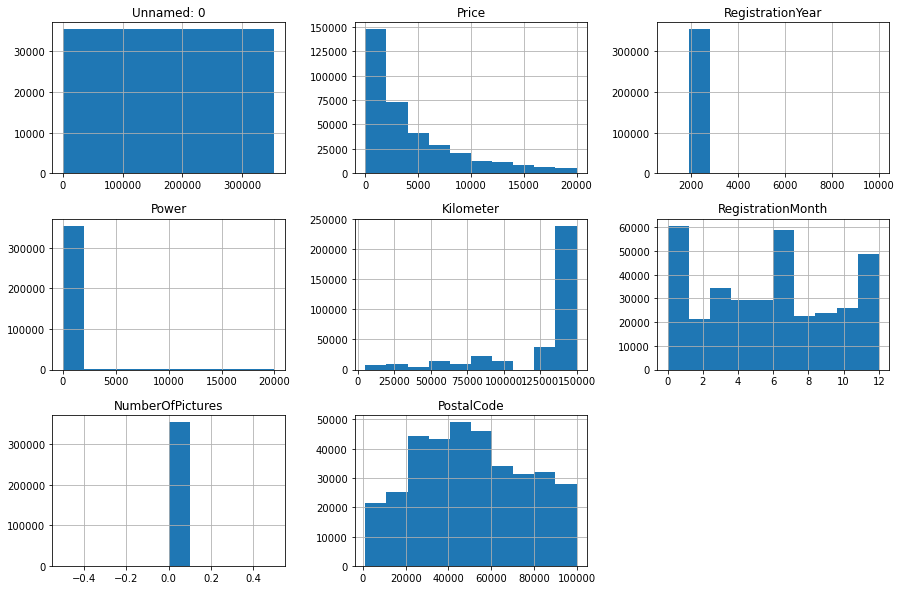

In [4]:
df.hist(figsize = (15, 10));

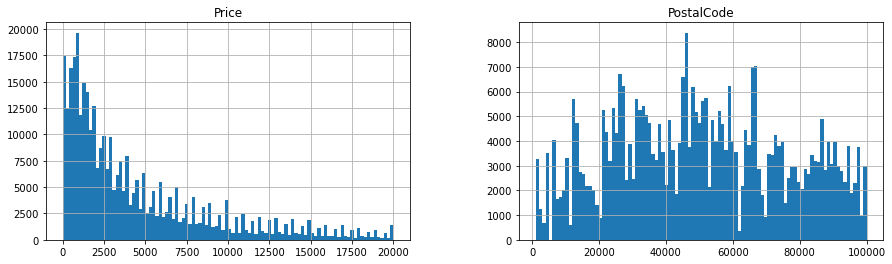

In [5]:
df[['Price', 'PostalCode']].hist(figsize = (15, 4), bins=100);

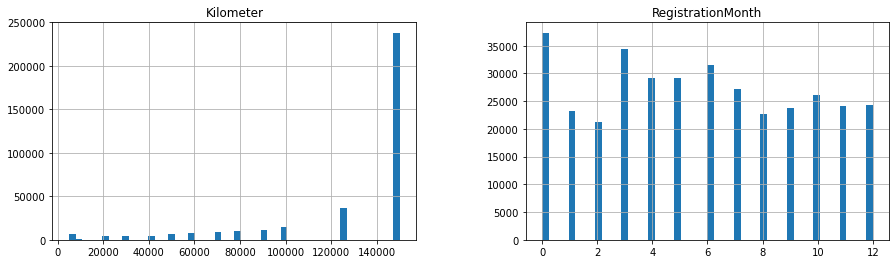

In [6]:
df[['Kilometer', 'RegistrationMonth']].hist(figsize = (15, 4), bins=50);

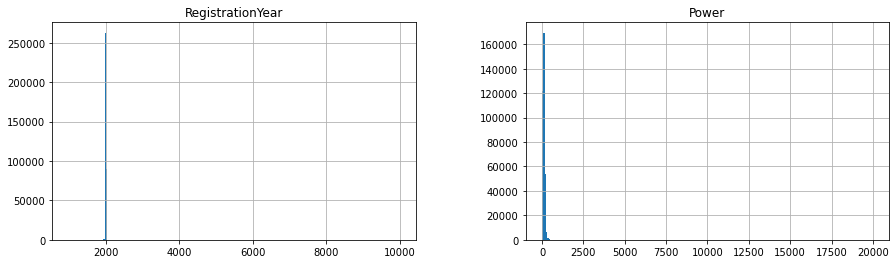

In [7]:
 df[['RegistrationYear', 'Power']].hist(figsize = (15, 4), bins=250);

<AxesSubplot:>

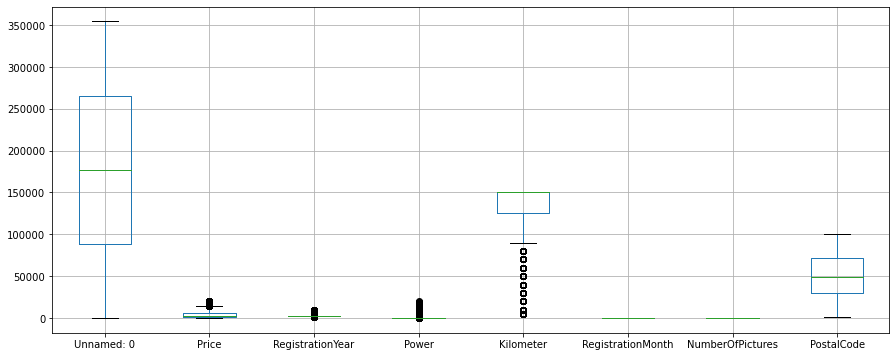

In [8]:
df.boxplot(figsize = (15, 6))

In [9]:
df.corr()

,Unnamed: 0,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Unnamed: 0,1.000000,-0.002426,-0.000368,0.001528,0.002950,0.001457,NaN,0.000592
Price,-0.002426,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,-0.000368,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.001528,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,0.002950,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.001457,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.000592,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


На основе полученных сведений о числовых данных, мы можем сделать вывод, что в имеющемся датасете у нас наблюдается большое количество странных и некорректных значений. Так, например, для колонки *Power* и *RegistrationYear* имеются выбросы до 10000 и до 20000 соответственно, что не соответствует реальности.

При этом числовые колонки имеют слабую корреляцию с целевым признаком, а поиск явных дубликатов не дал никаких результатов: пять найденных строк не являются дубликатами, а лишь похожими.

Далее мы рассмотрим каждую колонку в отдельности и проведем предобработку.

## EDA ##

Начнём с общей коректировки датасета, а именно - с названия колонок и удаления лишней под названием *Unnamed: 0, registrationmonth, numberofpictures и postalcode*.

In [10]:
df.columns = df.columns.str.lower()

df = df.drop(['unnamed: 0', 'registrationmonth', 'numberofpictures', 'postalcode'], axis=1)

In [11]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   datecrawled       354369 non-null  object
 1   price             354369 non-null  int64 
 2   vehicletype       316879 non-null  object
 3   registrationyear  354369 non-null  int64 
 4   gearbox           334536 non-null  object
 5   power             354369 non-null  int64 
 6   model             334664 non-null  object
 7   kilometer         354369 non-null  int64 
 8   fueltype          321474 non-null  object
 9   brand             354369 non-null  object
 10  repaired          283215 non-null  object
 11  datecreated       354369 non-null  object
 12  lastseen          354369 non-null  object
dtypes: int64(4), object(9)
memory usage: 35.1+ MB


None

datecrawled             0
price                   0
vehicletype         37490
registrationyear        0
gearbox             19833
power                   0
model               19705
kilometer               0
fueltype            32895
brand                   0
repaired            71154
datecreated             0
lastseen                0
dtype: int64

Теперь перейдем к непосредственной чистке датасета. Для этого создадим функцию вывода пропущенных значений и графика распределения для единичной колонки.

In [12]:
def eda_info(col):
    return (
        print('Число пропусков:', df[col].isnull().sum()),
        print(''),
        print('Уникальных значений: \n', df[col].unique),
        print(''),
        print('Сумма значений: \n', df[col].value_counts()),
        print(''),
        display(df.boxplot(col, figsize = (10, 6)))
           )

### 'price' ###

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0           480
1         18300
2          9800
3          1500
4          3600
          ...  
354364        0
354365     2200
354366     1199
354367     9200
354368     3400
Name: price, Length: 354369, dtype: int64>

Сумма значений: 
 0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
1368         1
233          1
11080        1
16340        1
10985        1
Name: price, Length: 3731, dtype: int64



<AxesSubplot:>

(None, None, None, None, None, None, None)

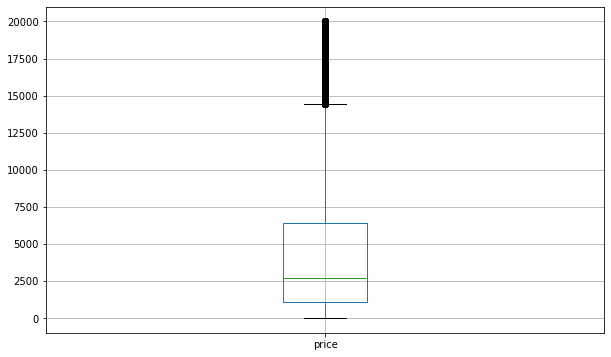

In [13]:
eda_info('price')

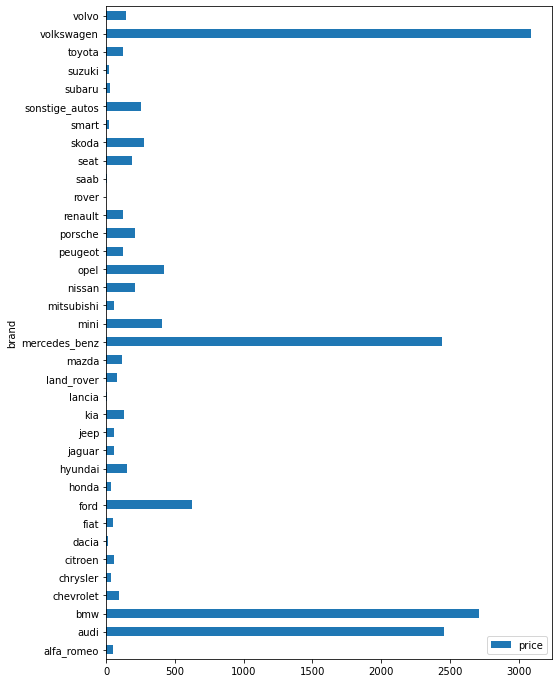

In [14]:
(
    df[df['price'] > 15000]
    .pivot_table(values='price', index='brand', aggfunc='count')
    .plot(kind = 'barh', figsize = (8, 12))
);

На гистограмме видно, что выбросы цен выше 15000 евро обусловлены в большинстве своём продажей автомобилей премиального сегмента (Volkswagen, BMW, Audi, Mercedez-Benz). Цена на остальные марки исходит из отличий от общего числа объявлений, конкретно - состояния автомобиля и его восприятия владельцем. В целом, всё в рамках разумного. Соответственно, данные выбросы удалены не будут.

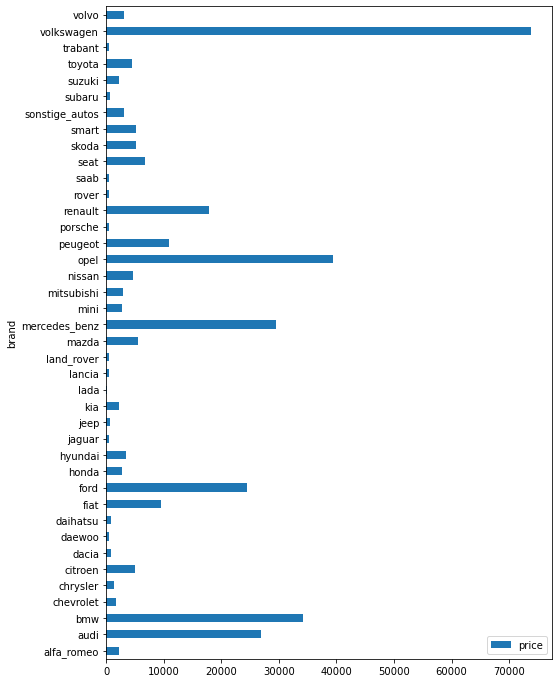

In [15]:
(
    df[df['price'] < 15000]
    .pivot_table(values='price', index='brand', aggfunc='count')
    .plot(kind = 'barh', figsize = (8, 12))
);

Аналогично выбросам, цены в диапазоне до 15000 евро также вписываются в общую картину происходящего.

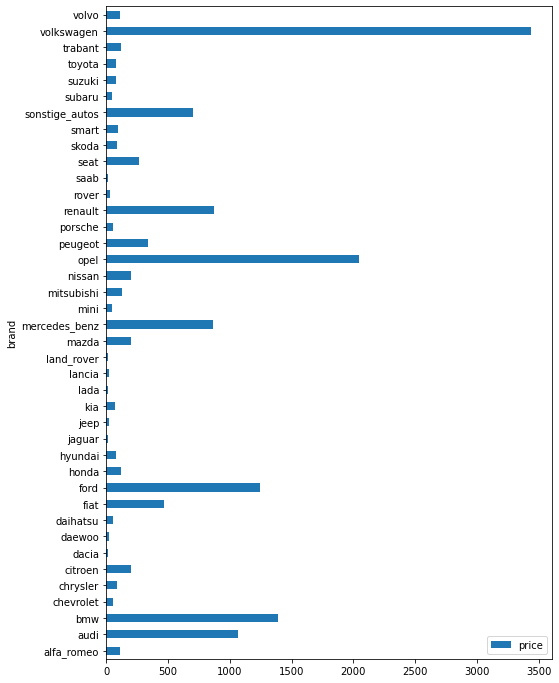

In [16]:
(
    df[df['price'] < 150]
    .pivot_table(values='price', index='brand', aggfunc='count')
    .plot(kind = 'barh', figsize = (8, 12))
);



### 'vehicletype' ###

In [17]:
df['vehicletype'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicletype, dtype: int64

In [18]:
df[df['vehicletype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,petrol,volkswagen,NaN,2016-04-01 00:00:00,2016-04-01 12:46:46
22,2016-03-23 14:52:51,2900,NaN,2018,manual,90,meriva,150000,petrol,opel,no,2016-03-23 00:00:00,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,NaN,citroen,no,2016-03-10 00:00:00,2016-03-16 09:16:46
31,2016-03-29 16:57:02,899,NaN,2016,manual,60,clio,150000,petrol,renault,NaN,2016-03-29 00:00:00,2016-03-29 17:43:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354346,2016-03-07 17:06:35,2600,NaN,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,2016-03-08 21:28:38
354351,2016-03-11 23:40:32,1900,NaN,2000,manual,110,NaN,150000,NaN,volkswagen,no,2016-03-11 00:00:00,2016-03-12 14:16:51
354361,2016-03-09 13:37:43,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no,2016-03-09 00:00:00,2016-03-13 01:44:13
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes,2016-03-21 00:00:00,2016-03-21 10:42:49


Так как пропусков слишком много, то удалить их не представляется возможным, поэтому мы выделим их в новую группу и присвоим значение *no_type*.

In [19]:
df['vehicletype'] = df['vehicletype'].fillna('no_type')
df['vehicletype'].value_counts()

sedan          91457
small          79831
wagon          65166
no_type        37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicletype, dtype: int64

### 'registrationyear' ###

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
354364    2005
354365    2005
354366    2000
354367    1996
354368    2002
Name: registrationyear, Length: 354369, dtype: int64>

Сумма значений: 
 2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
6500        1
2290        1
1001        1
9450        1
3500        1
Name: registrationyear, Length: 151, dtype: int64



<AxesSubplot:>

(None, None, None, None, None, None, None)

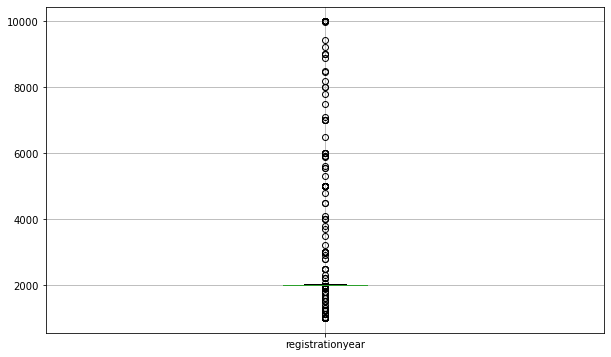

In [20]:
eda_info('registrationyear')

In [21]:
df = df.query('registrationyear < 2023')

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
354364    2005
354365    2005
354366    2000
354367    1996
354368    2002
Name: registrationyear, Length: 354264, dtype: int64>

Сумма значений: 
 2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
1255        1
1925        1
1400        1
1949        1
1946        1
Name: registrationyear, Length: 113, dtype: int64



<AxesSubplot:>

(None, None, None, None, None, None, None)

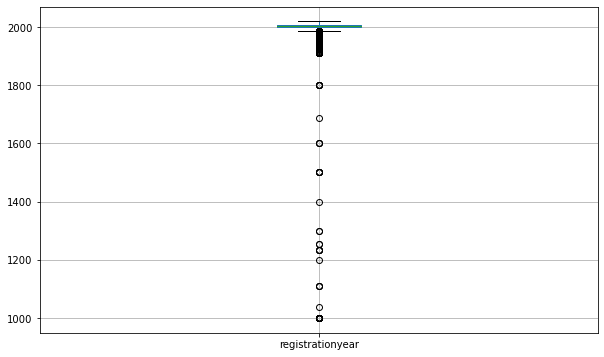

In [22]:
eda_info('registrationyear')

Здесь мы видим огромное количество некорректных данных ниже отметки 1800, поэтому мы просто удалим их, оставив лишь строки, где значения года регистрации автомобиля начинаются от 1960 года. Всё, что выходило раньше, имеет характер личной оценки и не может быть проанализировано средствами машинного обучения, так как данных по этим машинам просто нет, а они - раритет, имеющий коллекционное значение, а не практическое.

In [23]:
df = df.query('registrationyear > 1960')

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
354364    2005
354365    2005
354366    2000
354367    1996
354368    2002
Name: registrationyear, Length: 353654, dtype: int64>

Сумма значений: 
 2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
2003    19763
2004    19611
2002    19092
1998    17899
2007    17183
2008    15391
1997    14666
2009    14503
1996    10835
2010    10764
2017    10441
2011     9909
1995     9607
2016     9599
2012     7178
1994     4841
2013     4131
2018     3959
1993     3438
1992     3002
1990     2806
1991     2762
2014     2537
1989     1318
2015     1302
1988      942
1985      756
1987      667
1980      588
1986      538
1983      430
1984      399
1970      333
1982      316
1978      285
1979      283
1981      263
1972      213
1976      175
1977      173
1973      173
1974      169
1971      167
1975      143
19

<AxesSubplot:>

(None, None, None, None, None, None, None)

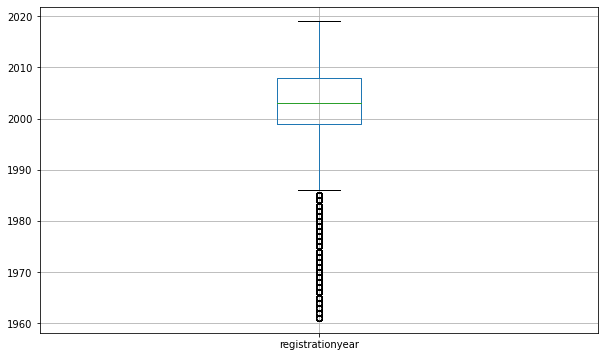

In [24]:
eda_info('registrationyear')

In [25]:
df.query('registrationyear < 1980')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
360,2016-03-17 14:52:07,10000,bus,1976,NaN,0,transporter,5000,petrol,volkswagen,NaN,2016-03-17 00:00:00,2016-03-19 14:21:08
534,2016-03-27 10:52:55,4900,convertible,1973,manual,44,kaefer,90000,petrol,volkswagen,no,2016-03-27 00:00:00,2016-04-07 06:44:31
630,2016-03-18 12:43:41,12000,sedan,1969,manual,140,s_klasse,80000,petrol,mercedes_benz,no,2016-03-18 00:00:00,2016-04-05 22:16:44
650,2016-03-30 11:55:46,15000,coupe,1971,NaN,0,NaN,5000,NaN,sonstige_autos,no,2016-03-30 00:00:00,2016-04-07 02:45:10
981,2016-03-05 18:50:21,2900,sedan,1971,auto,90,other,90000,petrol,opel,no,2016-03-05 00:00:00,2016-04-05 11:48:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353910,2016-03-24 12:54:29,11500,suv,1976,manual,100,other,150000,petrol,jeep,NaN,2016-03-24 00:00:00,2016-03-30 14:16:54
353912,2016-03-05 20:43:30,800,no_type,1970,NaN,0,other,150000,NaN,trabant,NaN,2016-03-05 00:00:00,2016-03-12 08:17:10
354037,2016-03-23 16:57:30,10500,convertible,1968,manual,54,other,20000,NaN,renault,no,2016-03-23 00:00:00,2016-03-25 00:47:18
354063,2016-03-08 23:37:04,0,no_type,1970,NaN,0,sl,150000,NaN,mercedes_benz,NaN,2016-03-08 00:00:00,2016-04-07 05:15:38


### 'gearboox' ###

In [26]:
display(df['gearbox'].unique())
display(df['gearbox'].value_counts())
print('Количество пропусков:', df['gearbox'].isnull().sum())

array(['manual', 'auto', nan], dtype=object)

manual    267958
auto       66246
Name: gearbox, dtype: int64

Количество пропусков: 19450


Учитывая большое число пропусков, удалить мы их не можем, а так как мы не знаем, какой именно тип коробки у конкретного автомобиля, то мы заменим их на значение *manual*. Однако ранее мы видели в колонке брендов значение sonstige_autos, которое в переводе означает "прицеп". Поэтому заменим пропуски по следующему условию:

In [27]:
df['gearbox'] = df['gearbox'].fillna(-1)

In [28]:
df.loc[(df['gearbox'] == -1) & (df['brand'] != 'sonstige_autos'), 'gearbox'] = df['gearbox'].replace(-1, 'manual')
#df[(df['gearbox'].isnull()) & (df['brand'] != 'sonstige_autos')] = df['gearbox'].fillna('manual')

<AxesSubplot:ylabel='gearbox'>

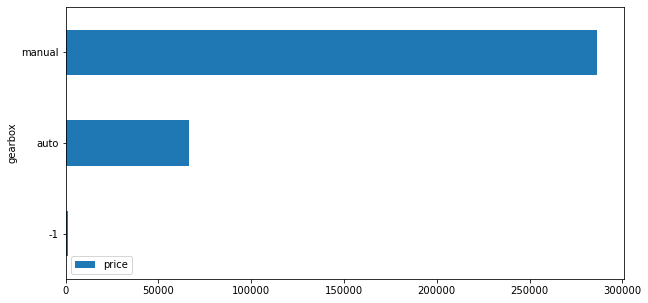

In [29]:
df.pivot_table(index='gearbox', values='price', aggfunc='count').plot(kind='barh', figsize = (10, 5))

In [30]:
df[(df['gearbox'] == -1) & (df['brand'] == 'sonstige_autos')]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
306,2016-03-21 14:38:37,200,no_type,2009,-1,0,NaN,10000,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,2016-03-24 02:47:34
650,2016-03-30 11:55:46,15000,coupe,1971,-1,0,NaN,5000,NaN,sonstige_autos,no,2016-03-30 00:00:00,2016-04-07 02:45:10
1345,2016-03-21 01:57:37,899,no_type,1990,-1,37,NaN,60000,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,2016-03-27 21:44:30
1537,2016-03-18 00:55:38,300,no_type,2010,-1,0,NaN,150000,NaN,sonstige_autos,NaN,2016-03-18 00:00:00,2016-03-23 17:48:43
2065,2016-03-07 15:06:23,0,no_type,2000,-1,0,NaN,5000,NaN,sonstige_autos,NaN,2016-03-07 00:00:00,2016-03-07 15:06:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353584,2016-03-31 17:56:10,1,no_type,2000,-1,0,NaN,10000,NaN,sonstige_autos,NaN,2016-03-31 00:00:00,2016-03-31 18:42:13
353892,2016-03-06 11:42:12,7900,bus,2009,-1,140,NaN,125000,gasoline,sonstige_autos,no,2016-03-06 00:00:00,2016-03-26 16:16:02
354073,2016-03-19 14:53:26,1750,no_type,1995,-1,0,NaN,100000,NaN,sonstige_autos,NaN,2016-03-19 00:00:00,2016-04-01 01:47:17
354083,2016-03-30 07:54:17,0,no_type,2000,-1,0,NaN,150000,NaN,sonstige_autos,NaN,2016-03-30 00:00:00,2016-04-06 23:46:19


Видно, что в датасете у строк с прицепами в колонке *vehicletype* типы кузовов различаются (есть автобусы и даже купе). Соответственно, удалим данные строки, оставив только типы вида *no_type* и *bus*.

In [31]:
df.drop(df[
    (df['gearbox'] == -1) & (df['brand'] == 'sonstige_autos') & 
    ((df['vehicletype'] != 'no_type') & (df['vehicletype'] != 'bus'))
  ].index, axis=0, inplace = True)

In [32]:
df[
    (df['gearbox'] == -1) & 
    (df['brand'] == 'sonstige_autos') & 
    ((df['vehicletype'] != 'no_type') & (df['vehicletype'] != 'bus'))
]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen


In [33]:
df.loc[
    (df['gearbox'] == -1) & 
    (df['vehicletype'] == 'bus') & 
    (df['brand'] == 'sonstige_autos'), 'gearbox'] = df['gearbox'].replace(-1, 'manual')

In [34]:
df[
    (df['gearbox'] == -1) & 
    (df['vehicletype'] == 'bus') & 
    (df['brand'] == 'sonstige_autos')]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen


### 'power' ###

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0           0
1         190
2         163
3          75
4          69
         ... 
354364      0
354365      0
354366    101
354367    102
354368    100
Name: power, Length: 353433, dtype: int64>

Сумма значений: 
 0       39611
75      24010
60      15883
150     14586
101     13297
        ...  
2789        1
519         1
2461        1
6006        1
1241        1
Name: power, Length: 710, dtype: int64



<AxesSubplot:>

(None, None, None, None, None, None, None)

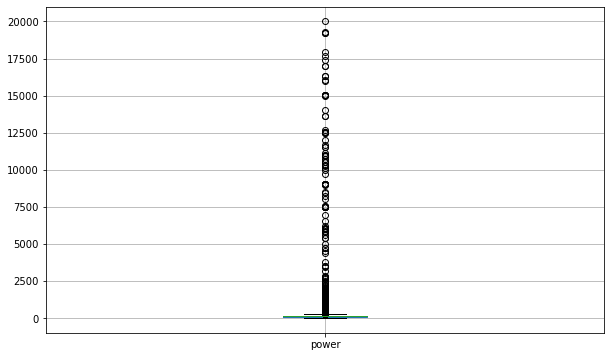

In [35]:
eda_info('power')

In [36]:
df.query('power > 400')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
1816,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,petrol,toyota,no,2016-03-22 00:00:00,2016-03-22 21:43:26
2102,2016-03-21 11:55:22,0,sedan,1999,manual,1799,vectra,150000,petrol,opel,yes,2016-03-21 00:00:00,2016-04-04 04:49:06
2781,2016-03-16 00:37:16,19500,suv,2004,auto,450,cayenne,125000,petrol,porsche,no,2016-03-16 00:00:00,2016-04-01 22:47:31
3289,2016-03-10 17:46:47,16899,wagon,2003,auto,476,e_klasse,150000,petrol,mercedes_benz,no,2016-03-10 00:00:00,2016-04-03 18:47:41
3746,2016-03-21 14:48:31,0,no_type,2017,manual,750,NaN,150000,petrol,smart,no,2016-03-21 00:00:00,2016-03-24 03:44:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353493,2016-04-02 20:54:21,12500,no_type,2017,manual,2000,other,60000,gasoline,chrysler,no,2016-04-02 00:00:00,2016-04-06 21:44:39
353633,2016-03-23 23:55:21,2400,sedan,2007,manual,650,c2,150000,petrol,citroen,NaN,2016-03-23 00:00:00,2016-03-27 01:15:17
354045,2016-03-22 20:48:48,20000,coupe,2006,auto,476,other,125000,petrol,mercedes_benz,no,2016-03-22 00:00:00,2016-03-24 05:16:02
354260,2016-03-09 17:59:03,399,other,1994,manual,1103,3er,150000,NaN,bmw,NaN,2016-03-09 00:00:00,2016-03-17 09:17:08


In [37]:
df = df.query('power < 400')

Число пропусков: 0

Уникальных значений: 
 <bound method Series.unique of 0           0
1         190
2         163
3          75
4          69
         ... 
354364      0
354365      0
354366    101
354367    102
354368    100
Name: power, Length: 352660, dtype: int64>

Сумма значений: 
 0      39611
75     24010
60     15883
150    14586
101    13297
       ...  
398        1
282        1
297        1
353        1
377        1
Name: power, Length: 381, dtype: int64



<AxesSubplot:>

(None, None, None, None, None, None, None)

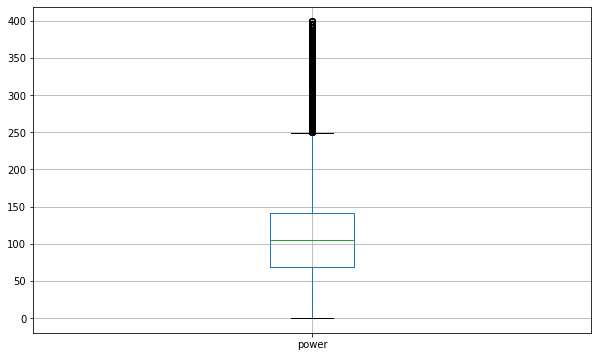

In [38]:
eda_info('power')

In [39]:
df.query('power == 0')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
0,2016-03-24 11:52:17,480,no_type,1993,manual,0,golf,150000,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
32,2016-03-15 20:59:01,245,sedan,1994,manual,0,golf,150000,petrol,volkswagen,no,2016-03-15 00:00:00,2016-03-17 18:17:43
37,2016-03-28 17:50:15,1500,no_type,2016,manual,0,kangoo,150000,gasoline,renault,no,2016-03-28 00:00:00,2016-03-30 09:18:02
40,2016-03-26 22:06:17,0,no_type,1990,manual,0,corsa,150000,petrol,opel,NaN,2016-03-26 00:00:00,2016-03-27 17:43:34
54,2016-03-17 07:56:40,4700,wagon,2005,manual,0,signum,150000,NaN,opel,no,2016-03-17 00:00:00,2016-04-04 04:17:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354338,2016-03-31 19:52:33,180,no_type,1995,manual,0,NaN,125000,petrol,opel,NaN,2016-03-31 00:00:00,2016-04-06 14:18:04
354346,2016-03-07 17:06:35,2600,no_type,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,2016-03-08 21:28:38
354363,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no,2016-03-27 00:00:00,2016-03-29 10:17:23
354364,2016-03-21 09:50:58,0,no_type,2005,manual,0,colt,150000,petrol,mitsubishi,yes,2016-03-21 00:00:00,2016-03-21 10:42:49


In [40]:
df['power'].median()

105.0

### 'model' ###

In [41]:
#.plot(kind='hist', figsize = (10, 5), alpha=0.5, bins=4)

In [42]:
df['model'] = df['model'].fillna('other')
df['model'].isna().sum()

0

### 'kilometer' ###

<AxesSubplot:>

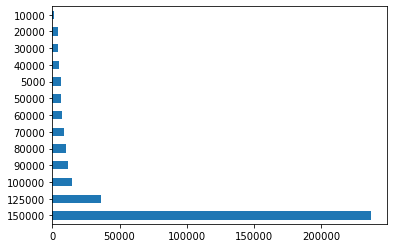

In [43]:
df['kilometer'].value_counts().sort_values(ascending=False).plot(kind='barh')

Здесь мы видим 13 категорий, которые мы переведем из числового значения в буквенное, а после этого закодируем

In [44]:
def kilometer_replace(col):
    if col == 5000:
        return 'A'
    if col == 10000:
        return 'B'
    if col == 20000:
        return 'C'
    if col == 30000:
        return 'D'
    if col == 40000:
        return 'E'
    if col == 50000:
        return 'F'
    if col == 60000:
        return 'G'
    if col == 70000:
        return 'H'
    if col == 80000:
        return 'I'
    if col == 90000:
        return 'K'
    if col == 100000:
        return 'J'
    if col == 125000:
        return 'L'
    if col == 150000:
        return 'M'
    
df['kilometer'] = df['kilometer'].apply(kilometer_replace)

df['kilometer'].value_counts()

M    237482
L     36341
J     14768
K     11529
I     10015
H      8552
G      7414
F      6180
A      6019
E      4892
D      4403
C      3930
B      1135
Name: kilometer, dtype: int64

### 'fueltype' ###

In [45]:
df['fueltype'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [46]:
df[df['fueltype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,M,NaN,volkswagen,NaN,2016-03-17 00:00:00,2016-03-31 17:17:06
13,2016-03-21 21:37:40,2500,wagon,2004,manual,131,passat,M,NaN,volkswagen,no,2016-03-21 00:00:00,2016-03-23 02:50:54
26,2016-03-10 19:38:18,5555,no_type,2017,manual,125,c4,L,NaN,citroen,no,2016-03-10 00:00:00,2016-03-16 09:16:46
36,2016-03-11 11:50:37,1600,other,1991,manual,75,kadett,H,NaN,opel,NaN,2016-03-11 00:00:00,2016-04-07 03:46:09
41,2016-03-30 20:38:20,7500,sedan,2002,auto,306,e_klasse,M,NaN,mercedes_benz,NaN,2016-03-30 00:00:00,2016-04-03 11:44:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354339,2016-03-20 12:46:00,3850,convertible,2006,manual,108,2_reihe,L,NaN,peugeot,no,2016-03-20 00:00:00,2016-03-26 21:18:23
354346,2016-03-07 17:06:35,2600,no_type,2005,auto,0,c_klasse,M,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,2016-03-08 21:28:38
354351,2016-03-11 23:40:32,1900,no_type,2000,manual,110,other,M,NaN,volkswagen,no,2016-03-11 00:00:00,2016-03-12 14:16:51
354361,2016-03-09 13:37:43,5250,no_type,2016,auto,150,159,M,NaN,alfa_romeo,no,2016-03-09 00:00:00,2016-03-13 01:44:13


In [47]:
df['fueltype'] = df['fueltype'].fillna('other')

df.query('fueltype == "other"')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,M,other,volkswagen,NaN,2016-03-17 00:00:00,2016-03-31 17:17:06
13,2016-03-21 21:37:40,2500,wagon,2004,manual,131,passat,M,other,volkswagen,no,2016-03-21 00:00:00,2016-03-23 02:50:54
26,2016-03-10 19:38:18,5555,no_type,2017,manual,125,c4,L,other,citroen,no,2016-03-10 00:00:00,2016-03-16 09:16:46
36,2016-03-11 11:50:37,1600,other,1991,manual,75,kadett,H,other,opel,NaN,2016-03-11 00:00:00,2016-04-07 03:46:09
41,2016-03-30 20:38:20,7500,sedan,2002,auto,306,e_klasse,M,other,mercedes_benz,NaN,2016-03-30 00:00:00,2016-04-03 11:44:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354339,2016-03-20 12:46:00,3850,convertible,2006,manual,108,2_reihe,L,other,peugeot,no,2016-03-20 00:00:00,2016-03-26 21:18:23
354346,2016-03-07 17:06:35,2600,no_type,2005,auto,0,c_klasse,M,other,mercedes_benz,NaN,2016-03-07 00:00:00,2016-03-08 21:28:38
354351,2016-03-11 23:40:32,1900,no_type,2000,manual,110,other,M,other,volkswagen,no,2016-03-11 00:00:00,2016-03-12 14:16:51
354361,2016-03-09 13:37:43,5250,no_type,2016,auto,150,159,M,other,alfa_romeo,no,2016-03-09 00:00:00,2016-03-13 01:44:13


### 'brand' ###

In [48]:
df['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

<AxesSubplot:ylabel='brand'>

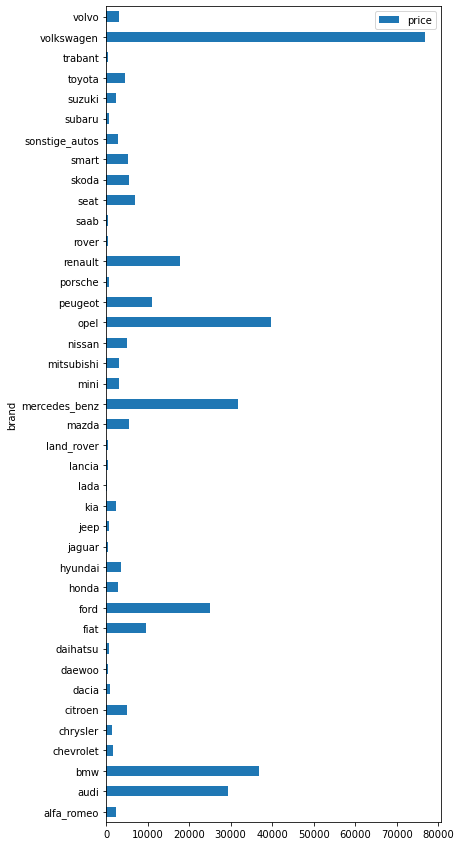

In [49]:
df.pivot_table(index='brand', values='price', aggfunc='count').plot(kind='barh', figsize=(6, 15))

### 'repaired' ###

In [50]:
df[df['repaired'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
0,2016-03-24 11:52:17,480,no_type,1993,manual,0,golf,M,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,L,gasoline,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,D,petrol,ford,NaN,2016-04-04 00:00:00,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,M,other,volkswagen,NaN,2016-03-17 00:00:00,2016-03-31 17:17:06
12,2016-03-15 22:49:09,999,wagon,1995,manual,115,passat,M,petrol,volkswagen,NaN,2016-03-15 00:00:00,2016-04-01 13:16:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354349,2016-03-16 17:06:19,5999,wagon,2005,manual,140,a4,M,gasoline,audi,NaN,2016-03-16 00:00:00,2016-03-18 11:30:17
354356,2016-04-04 11:45:16,999,convertible,2000,manual,95,megane,M,petrol,renault,NaN,2016-04-04 00:00:00,2016-04-06 12:44:52
354357,2016-03-09 11:36:55,1690,wagon,2004,manual,55,fabia,M,petrol,skoda,NaN,2016-03-09 00:00:00,2016-04-04 08:15:30
354365,2016-03-14 17:48:27,2200,no_type,2005,-1,0,other,C,other,sonstige_autos,NaN,2016-03-14 00:00:00,2016-04-06 00:46:52


Свыше 70 тысяч значений, что является чуть ли не 20% общего числа строк датасета может свидетельствовать о том, что при заполнении объявления пункт о наличии ремонта не является обязательным, поэтому его игнорируют либо случайно, либо намеренно. Отсюда мы сделаем вывод, что наиболее логичным будет вариант заполнением пропусков значением *no*.

In [51]:
df['repaired'] = df['repaired'].fillna('no')

In [52]:
df.head(10)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired,datecreated,lastseen
0,2016-03-24 11:52:17,480,no_type,1993,manual,0,golf,M,petrol,volkswagen,no,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,other,L,gasoline,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,L,gasoline,jeep,no,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,M,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,K,gasoline,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,M,petrol,bmw,yes,2016-04-04 00:00:00,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,M,petrol,peugeot,no,2016-04-01 00:00:00,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,E,petrol,volkswagen,no,2016-03-21 00:00:00,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,D,petrol,ford,no,2016-04-04 00:00:00,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,M,other,volkswagen,no,2016-03-17 00:00:00,2016-03-31 17:17:06


### Вывод ###

## Подготовка датасета к созданию ML-модели ##

In [54]:
# избавимся от ненужных колонок, которые не будут участвовать в построении модели
df = df.drop(['datecrawled', 'datecreated', 'lastseen'], axis = 1)

# закодируем категориальные колонки
df

KeyError: "['datecrawled', 'datecreated', 'lastseen'] not found in axis"

In [55]:
df

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired
0,480,no_type,1993,manual,0,golf,M,petrol,volkswagen,no
1,18300,coupe,2011,manual,190,other,L,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,L,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,M,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,K,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,no_type,2005,manual,0,colt,M,petrol,mitsubishi,yes
354365,2200,no_type,2005,-1,0,other,C,other,sonstige_autos,no
354366,1199,convertible,2000,auto,101,fortwo,L,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,M,gasoline,volkswagen,no


In [56]:
df.query('brand == "mitsubishi" & model == "colt"')

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,fueltype,brand,repaired
247,895,sedan,1995,manual,75,colt,H,petrol,mitsubishi,no
888,2499,small,2006,manual,95,colt,M,gasoline,mitsubishi,no
1097,800,sedan,1999,manual,75,colt,M,petrol,mitsubishi,no
1220,1390,sedan,1998,manual,75,colt,M,petrol,mitsubishi,no
1504,5790,sedan,2011,manual,95,colt,H,petrol,mitsubishi,no
...,...,...,...,...,...,...,...,...,...,...
352184,3200,small,2005,manual,150,colt,M,petrol,mitsubishi,no
352259,850,sedan,1996,manual,75,colt,M,petrol,mitsubishi,no
353593,3500,sedan,2007,manual,95,colt,L,petrol,mitsubishi,no
354169,3000,no_type,2016,manual,0,colt,M,gasoline,mitsubishi,no
